* * *
<pre> NYU Paris            <i> Machine Learning - Summer 2023 </i></pre>
* * *


<h1 align="center"> Lab: the multilayer perceptron </h1>

<pre align="left"> June 07th 2023               <i> Author: Guillaume Staerman </i></pre>
* * *


##### Goal:
- Implement your Multilayer perceptron model

## Installing and importing Pytorch

In [125]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor


# Versions of torch and torchvision have to be compatible.
# check here: https://github.com/pytorch/pytorch/wiki/PyTorch-Versions

In [126]:
import torchvision

In [127]:
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


### Loading and preparing the MNIST dataset

In [128]:
# Define training and testing data using the functions in the cell above.

train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## Question 1

### Visualize some elements of the dataset:

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


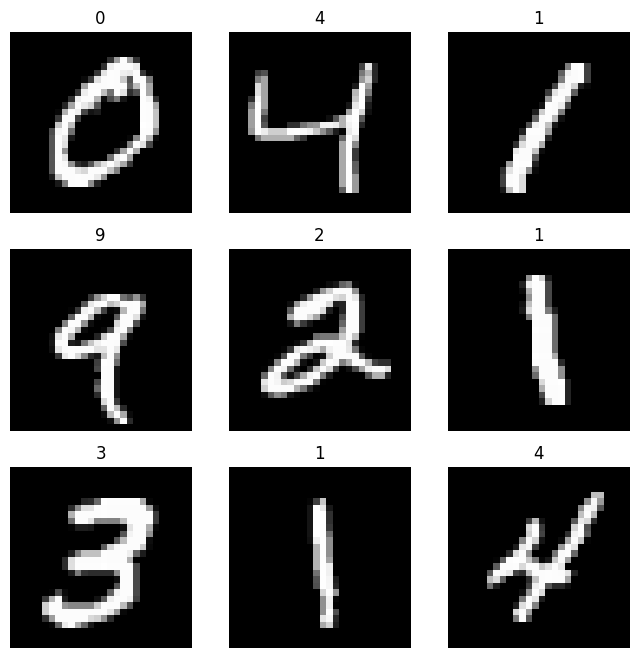

In [129]:
import matplotlib.pyplot as plt
# Visualize some images of the MNIST dataset
# Size of training data
print(train_data.data.shape)

# Size of testing data
print(test_data.data.shape)

labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = i
    img, label = train_data[sample_idx][:-1][0], train_data[sample_idx][-1]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [130]:
train_data.targets[0].item()

5

## Question 2

### Define a dataloader to construct a batch-wise iterator from your train/test data


In [131]:
from torch.utils.data import DataLoader

BATCH_SIZE = 4
trainloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
testloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

## Question 3

### Design your own Neural Network

In [132]:
import torch.nn as nn
import torch.nn.functional as F
# number of features (len of X cols)
input_dim = 28 * 28

# number of hidden layers
hidden_dim = 256

# number of classes (unique of y)
output_dim = 10

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h_relu = F.relu(self.linear1(x.view(BATCH_SIZE,-1)))
        y_pred = self.linear2(h_relu)
        return y_pred

## Question 4

### Train your neural network on the trainloader

In [133]:
from torch.nn.functional import nll_loss, cross_entropy
import torch.optim as optim

mlp = MLP()
print(mlp.parameters)

# Optimizer
epochs = 2
learning_rate = 1e-6
optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)

# Choice of the loss
criterion = cross_entropy # nll_loss

losses = []
for t in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data

        # set optimizer to zero grad to remove previous epoch gradients
        optimizer.zero_grad()

        # Evaluate the loss
        # outputs = mlp.forward(inputs)
        outputs = mlp(inputs)
        # loss = nll_loss(outputs, labels)
        loss = criterion(outputs, labels)

        # backward propagation
        loss.backward()

        # One optimization step
        optimizer.step()
        losses.append(loss.item())

        if not i % 2000:
            print(t, i, loss.item())

<bound method Module.parameters of MLP(
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=10, bias=True)
)>
0 0 2.2080416679382324
0 2000 2.218386650085449
0 4000 2.2581677436828613
0 6000 2.1700167655944824
0 8000 2.172699451446533
0 10000 2.158163547515869
0 12000 1.7158749103546143
0 14000 1.9823225736618042
1 0 1.9271173477172852
1 2000 1.8872544765472412
1 4000 1.9060211181640625
1 6000 1.9362854957580566
1 8000 1.399822473526001
1 10000 1.374732494354248
1 12000 1.2345325946807861
1 14000 1.5562185049057007


## Question 5

### Inspect the optimization procedure through the loss (plot the loss), what do you observe?

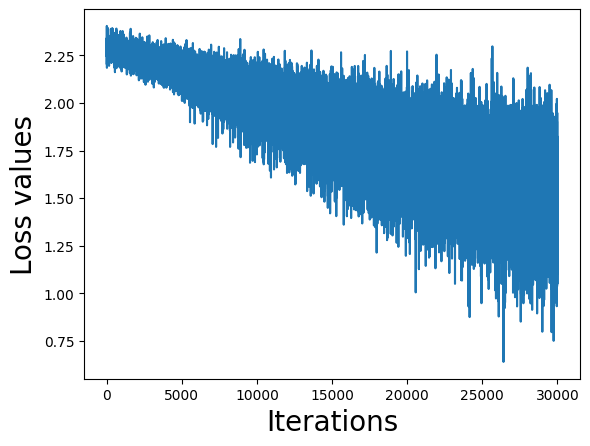

Final Loss 1.4596428871154785


In [134]:
plt.plot(losses)
plt.xlabel("Iterations", size=20)
plt.ylabel("Loss values", size=20)
plt.show()
print("Final Loss", losses[-1])

We observe very big oscillations of the loss curve. However, the mean of oscillations still gradually decreased.

## Question 6

### Evaluate the quality of your classifier on the test set

In [135]:
size_test = test_data.data.shape[0]

correct = 0
for data in testloader:
    inputs, labels = data
    outputs = mlp(inputs)
    loss = criterion(outputs, labels)
    predicted = torch.max(outputs.data, 1)[1]
    correct += (predicted == labels).sum()

final_accuracy =  correct/size_test

print(final_accuracy)

tensor(0.8036)


## Question 7 (Bonus)

### Repeat this training with different loss (nll/cross_entropy...) and different number of epochs. What do you observe?

In [136]:
mlp = MLP()
print(mlp.parameters)

# Optimizer
epochs = 10
learning_rate = 1e-6
optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)

# Choice of the loss
criterion = nn.CrossEntropyLoss() # nll_loss

losses = []
for t in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data

        # set optimizer to zero grad to remove previous epoch gradients
        optimizer.zero_grad()

        # Evaluate the loss
        # outputs = mlp.forward(inputs)
        outputs = mlp(inputs)
        # loss = nll_loss(outputs, labels)
        loss = criterion(outputs, labels)

        # backward propagation
        loss.backward()

        # One optimization step
        optimizer.step()
        losses.append(loss.item())

        if not i % 2000:
            print(t, i, loss.item())

<bound method Module.parameters of MLP(
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=10, bias=True)
)>
0 0 2.2929916381835938
0 2000 2.242219924926758
0 4000 2.162976026535034
0 6000 2.155136823654175
0 8000 2.117424964904785
0 10000 2.0963990688323975
0 12000 2.1271328926086426
0 14000 1.6485735177993774
1 0 2.01924729347229
1 2000 1.658145546913147
1 4000 1.6832311153411865
1 6000 1.4413007497787476
1 8000 1.829797387123108
1 10000 1.41432785987854
1 12000 1.7112014293670654
1 14000 1.3936690092086792
2 0 1.5698986053466797
2 2000 1.2914341688156128
2 4000 1.3988229036331177
2 6000 1.6144170761108398
2 8000 1.4303820133209229
2 10000 1.4383063316345215
2 12000 1.2299294471740723
2 14000 1.3954195976257324
3 0 0.8501061797142029
3 2000 1.2734944820404053
3 4000 1.2075345516204834
3 6000 1.5850350856781006
3 8000 1.1390817165374756
3 10000 0.5806649327278137
3 12000 1.0321698188781738
3 14000 0.6645190119743347
4 0 

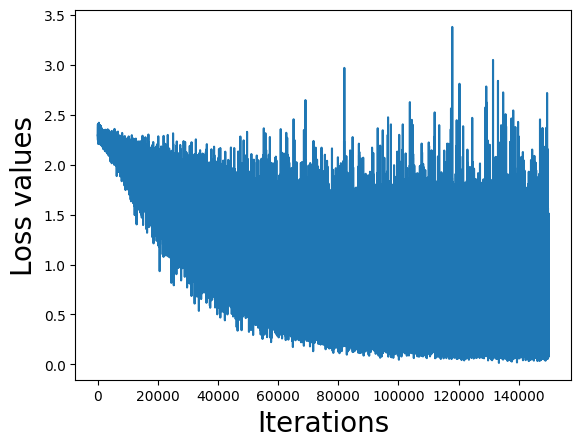

Final Loss 0.8601624965667725


In [137]:
plt.plot(losses)
plt.xlabel("Iterations", size=20)
plt.ylabel("Loss values", size=20)
plt.show()
print("Final Loss", losses[-1])

In [138]:
size_test = test_data.data.shape[0]

correct = 0
for data in testloader:
    inputs, labels = data
    outputs = mlp(inputs)
    loss = criterion(outputs, labels)
    predicted = torch.max(outputs.data, 1)[1]
    correct += (predicted == labels).sum()

final_accuracy =  correct/size_test

print(final_accuracy)

tensor(0.8843)


With bigger number of epochs accuracy improved by 8%. But still curve oscilates a lot.